In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

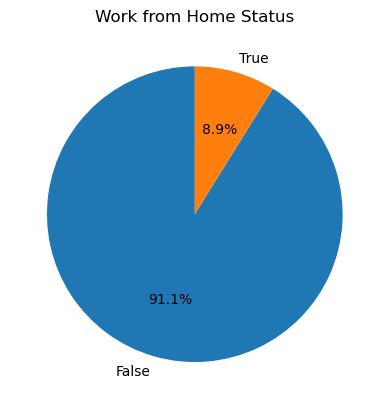

In [8]:
df["job_work_from_home"].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%")
plt.title("Work from Home Status")
plt.ylabel("")
plt.show()

In [ ]:
df[["job_work_from_home", "job_no_degree_mention", "job_health_insurance"]]


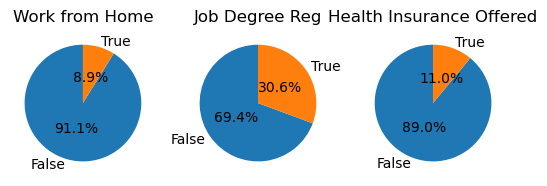

In [30]:
fig, ax = plt.subplots(1, 3)

dict_column = {
  "job_work_from_home": "Work from Home",
  "job_no_degree_mention" : "Job Degree Reg",
  "job_health_insurance": "Health Insurance Offered"
}

for i, (key, value) in enumerate(dict_column.items()):
    ax[i].pie(df[key].value_counts(), autopct="%1.1f%%", startangle=90, pctdistance=0.45, labels=["False", "True"])
    ax[i].set_title(value)

plt.show()